# Analyzing King Kohli's Centuries in International Cricket

The compilation "List of International Cricket Centuries by Virat Kohli (80*)" highlights the impressive centuries scored by the renowned Indian cricketer, Virat Kohli, across different formats of the game. It showcases his exceptional batting skills and commitment to cricket.

Data Source: https://www.kaggle.com/datasets/drahulsingh/virat-kohli-all-international-cricket-centuries/data

# EDA

### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [ ]:
from google.colab import files
import io

# in this way the file is stored locally on this colab file

# uploading the file
uploaded = files.upload()

Saving Virat-Kohli-International-Cricket-Centuries.csv to Virat-Kohli-International-Cricket-Centuries.csv


In [ ]:
# reading the csv file into a DataFrame
filename = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded['Virat-Kohli-International-Cricket-Centuries.csv']))

### General Information About the Dataset & Preprocessing

In [ ]:
# Rows and Features
data.shape

(80, 9)

In [ ]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       80 non-null     int64 
 1   Runs      80 non-null     object
 2   Against   80 non-null     object
 3   Position  80 non-null     int64 
 4   Innings   80 non-null     int64 
 5   Venue     80 non-null     object
 6   Ground    79 non-null     object
 7   Date      80 non-null     object
 8   Result    80 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.8+ KB


In [ ]:
# first 5 rows
data.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [ ]:
# last 5 rows
data.tail()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
75,76,121,West Indies,4,1,"Queen's Park Oval, Port of Spain",Away,20-Jul-23,Drawn
76,77,122*,Pakistan,3,1,"R. Premadasa Stadium, Colombo",Neutral,11-Sep-23,Won
77,78,103*,Bangladesh,3,2,"Maharashtra Cricket Association Stadium, Pune",Home,19-Oct-23,Won
78,79,101*,South Africa,3,1,"Eden Gardens, Kolkata",NaN,05-Nov,Won
79,80,117,New Zealand,3,1,"Wankhede Stadium, Mumbai",Home,15-Nov-23,Won


In [ ]:
# checking for duplicated rows in the dataset
data[data.duplicated()].shape[0]

0

---> There are no duplicated rows in the dataset.


---



In [ ]:
#  identifing and counting the number of missing (NaN) values
data.isna().sum()

,0
No.,0
Runs,0
Against,0
Position,0
Innings,0
Venue,0
Ground,1
Date,0
Result,0


---> There is 1 NaN value in the dataset.


---



In [ ]:
# Check for NaN values in the entire DataFrame
nan_rows = data[data.isnull().any(axis=1)]

# Print rows containing NaN values
print(nan_rows)

    No.  Runs       Against  Position  Innings                  Venue Ground  \
78   79  101*  South Africa         3        1  Eden Gardens, Kolkata    NaN   

      Date Result  
78  05-Nov    Won  


---> We can see that it is a home ground, so we are going to add "Home" to it.


---



In [ ]:
# Replace NaN values in the 'Ground' column with 'Home'
data['Ground'].fillna('Home', inplace=True)

In [ ]:
# Checking if the (NaN) value is gone
data.isna().sum()

,0
No.,0
Runs,0
Against,0
Position,0
Innings,0
Venue,0
Ground,0
Date,0
Result,0


---> It has been replaced successfully.


---



In [ ]:
#a value of ‘all’so that categorical features are also included

data.describe(include='all')

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
count,80.0000,80,80,80.000000,80.00000,80,80,80,80
unique,NaN,60,15,NaN,NaN,49,3,79,6
top,NaN,107,Australia,NaN,NaN,"Adelaide Oval, Adelaide",Home,09-Dec-14,Won
freq,NaN,5,16,NaN,NaN,5,38,2,55
mean,40.5000,NaN,NaN,3.500000,1.67500,NaN,NaN,NaN,NaN
std,23.2379,NaN,NaN,0.656033,0.67082,NaN,NaN,NaN,NaN
min,1.0000,NaN,NaN,2.000000,1.00000,NaN,NaN,NaN,NaN
25%,20.7500,NaN,NaN,3.000000,1.00000,NaN,NaN,NaN,NaN
50%,40.5000,NaN,NaN,3.000000,2.00000,NaN,NaN,NaN,NaN
75%,60.2500,NaN,NaN,4.000000,2.00000,NaN,NaN,NaN,NaN


In [ ]:
# Creating a new column (out or not out)
data['Status'] = data['Runs'].map(lambda x: 'Not Out' if '*' in x else 'Out')

In [ ]:
data.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Status
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won,Out
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won,Out
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won,Not Out


In [ ]:
# Removing the '*' symbol from Runs Column
data['Runs'] = data['Runs'].str.replace('*','')

In [ ]:
data.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Status
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won,Out
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won,Out
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won,Not Out


In [ ]:
data['Runs'].max()

'254 '

In [ ]:
data['Runs'].min()

'100'

In [ ]:
data['Result'].value_counts()

,count
Result,
Won,55
Lost,13
Drawn,9
Lost (D/L),1
Won (D/L),1
Tied,1


In [ ]:
data['Ground'].value_counts()

,count
Ground,
Home,38
Away,36
Neutral,6


In [ ]:
data['Position'].value_counts()

,count
Position,
3,43
4,32
5,3
6,1
2,1


In [ ]:
data['Innings'].value_counts()

,count
Innings,
2,42
1,33
3,3
4,2


In [ ]:
data['Venue'].value_counts()

,count
Venue,
"Adelaide Oval, Adelaide",5
"Eden Gardens, Kolkata",4
"R. Premadasa Stadium, Colombo",4
"Sher-e-Bangla Cricket Stadium, Dhaka",4
"Queen's Park Oval, Port of Spain",4
"Maharashtra Cricket Association Stadium, Pune",3
"Vidarbha Cricket Association Stadium, Nagpur",3
"Wankhede Stadium, Mumbai",3
"JSCA International Stadium, Ranchi",2


In [ ]:
data['Against']. value_counts()

,count
Against,
Australia,16
Sri Lanka,15
West Indies,11
New Zealand,8
England,8
South Africa,7
Bangladesh,6
Pakistan,2
Zimbabwe,1


---> There is an issue of consistency here; due to that there are some countries that are repeated again with separate counts of centuries;

In [ ]:
# Remove leading/trailing spaces
data['Against'] = data['Against'].str.strip()

# Convert to lowercase for consistency
data['Against'] = data['Against'].str.lower()

data['Against']. value_counts()

,count
Against,
australia,16
sri lanka,15
west indies,12
new zealand,9
england,8
south africa,8
bangladesh,7
pakistan,3
zimbabwe,1


In [53]:
#converting the entire column to a datatime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce', dayfirst=True)

In [54]:
data

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Status,Category
0,1,107,sri lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,Out,100-149
1,2,102,bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,Not Out,100-149
2,3,118,australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,Out,100-149
3,4,105,new zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,Out,100-149
4,5,100,bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,Not Out,100-149
...,...,...,...,...,...,...,...,...,...,...,...
75,76,121,west indies,4,1,"Queen's Park Oval, Port of Spain",Away,2023-07-20,Drawn,Out,100-149
76,77,122,pakistan,3,1,"R. Premadasa Stadium, Colombo",Neutral,2023-09-11,Won,Not Out,100-149
77,78,103,bangladesh,3,2,"Maharashtra Cricket Association Stadium, Pune",Home,2023-10-19,Won,Not Out,100-149
78,79,101,south africa,3,1,"Eden Gardens, Kolkata",Home,NaT,Won,Not Out,100-149


In [ ]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       80 non-null     int64 
 1   Runs      80 non-null     object
 2   Against   80 non-null     object
 3   Position  80 non-null     int64 
 4   Innings   80 non-null     int64 
 5   Venue     80 non-null     object
 6   Ground    80 non-null     object
 7   Date      80 non-null     object
 8   Result    80 non-null     object
 9   Status    80 non-null     object
dtypes: int64(3), object(7)
memory usage: 6.4+ KB


### Univariate & Bivariate Analysis

Centuries in Terms of Milestones


---




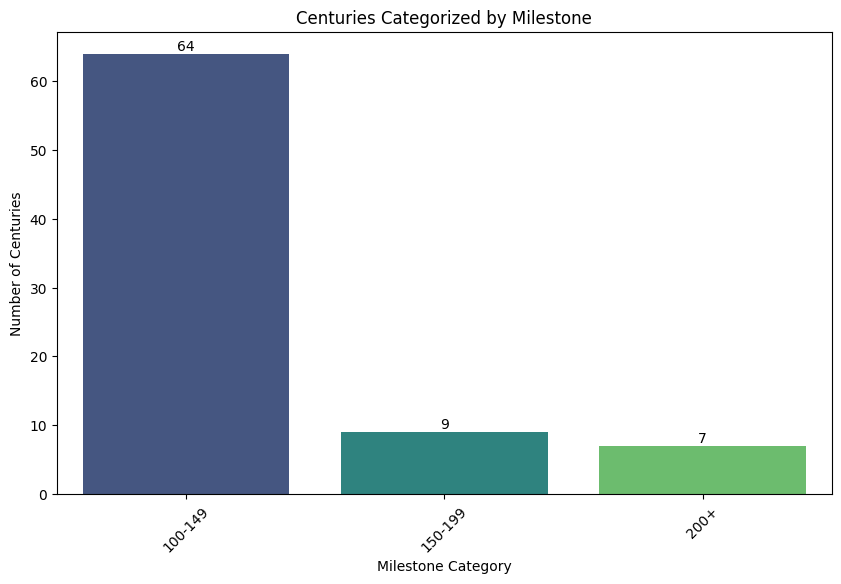

In [ ]:
# Converting the 'Runs' column to numeric, if not done already
data['Runs'] = pd.to_numeric(data['Runs'], errors='coerce')

# Categorizing the centuries
def categorize_runs(runs):
    if 100 <= runs < 150:
        return '100-149'
    elif 150 <= runs < 200:
        return '150-199'
    elif runs >= 200:
        return '200+'
    return None

data['Category'] = data['Runs'].apply(categorize_runs)

# Counting the number of centuries in each category
category_counts = data['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Adding counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.title('Centuries Categorized by Milestone')
plt.xlabel('Milestone Category')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45)
plt.show()

Effect of His Different Milestones on India's Result


---



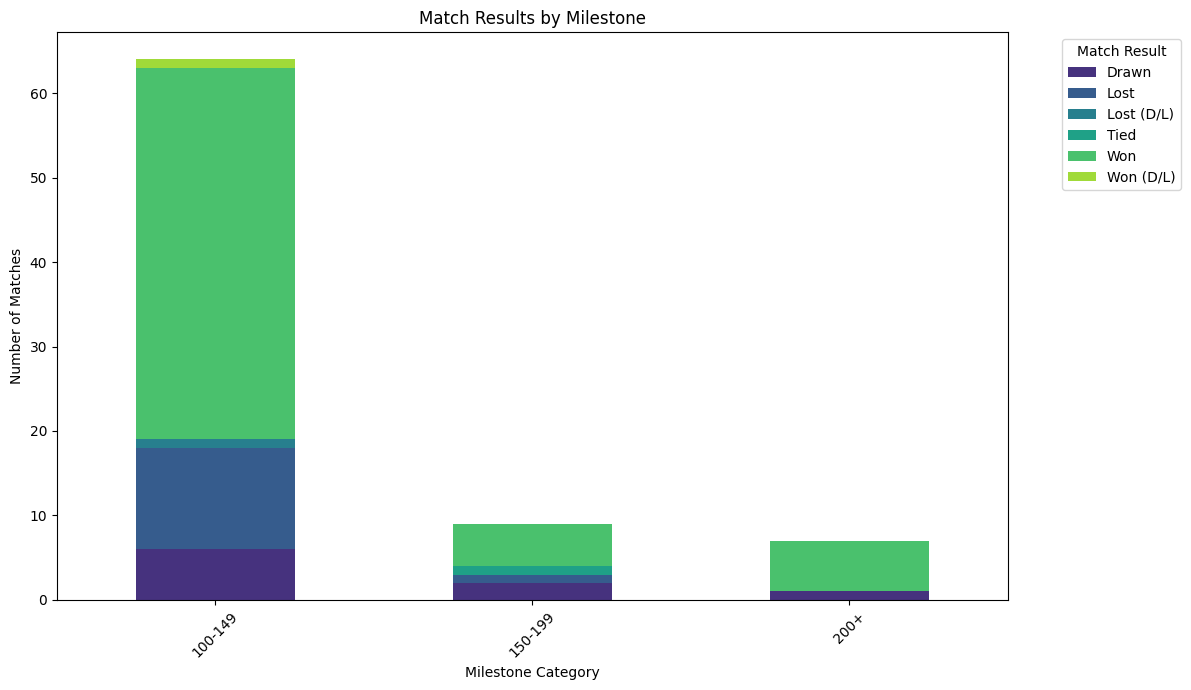

In [ ]:
result_counts = data.groupby(['Category', 'Result']).size().unstack(fill_value=0)

# Plotting
result_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=sns.color_palette("viridis", len(result_counts.columns)))
plt.title('Match Results by Milestone')
plt.xlabel('Milestone Category')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Match Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
result_counts = data.groupby(['Category', 'Result']).size().unstack(fill_value=0)

# Reseting index for better formatting
result_counts = result_counts.reset_index()

# Displaying the results in a tabular format
print(result_counts)

Result Category  Drawn  Lost  Lost (D/L)  Tied  Won  Won (D/L)
0       100-149      6    12           1     0   44          1
1       150-199      2     1           0     1    5          0
2          200+      1     0           0     0    6          0


---> Whenever he has scored 200+, India has for certain ensured a neutral or positive result; with 6 cases of victories and 1 draw.

Centuries against Teams


---




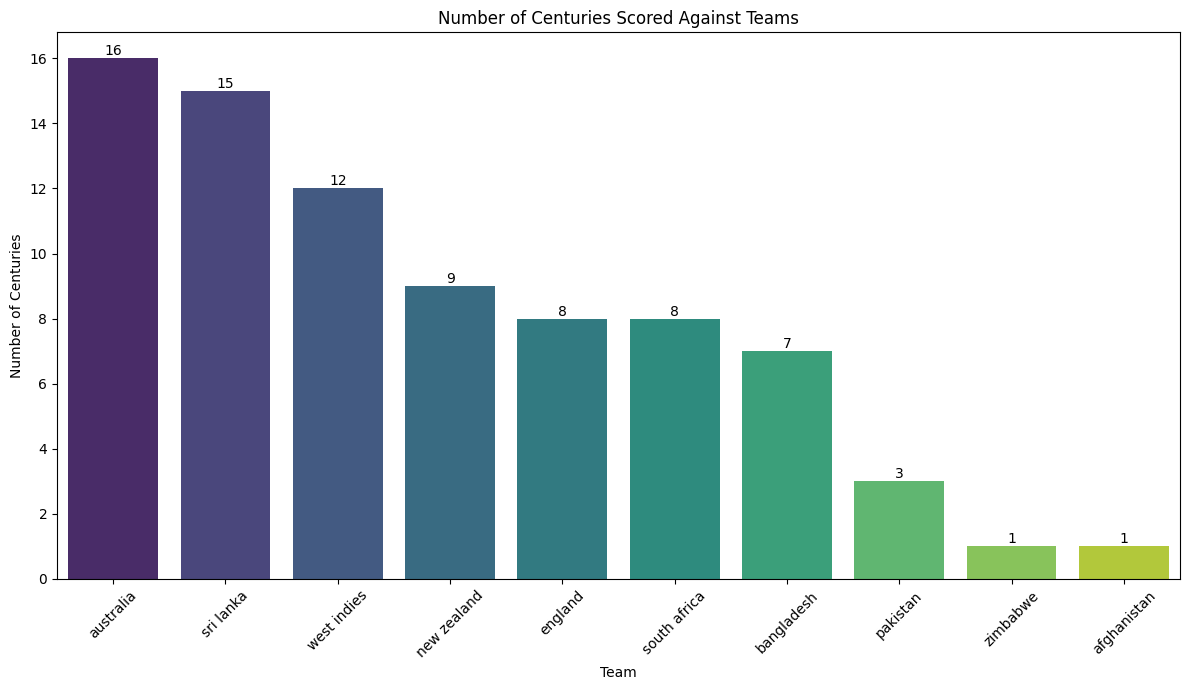

In [ ]:
centuries_by_team = data['Against'].value_counts()

# Creating a DataFrame for better handling
centuries_data = centuries_by_team.reset_index()
centuries_data.columns = ['Team', 'Centuries']

# Sorting in descending order
centuries_data = centuries_data.sort_values(by='Centuries', ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x='Team', y='Centuries', data=centuries_data, palette='viridis')

# Adding counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.title('Number of Centuries Scored Against Teams')
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> The fact that his favorite team to score a century against is Australia speaks volumes about his greatness as a player.

Effect of His Centuries against Teams


---



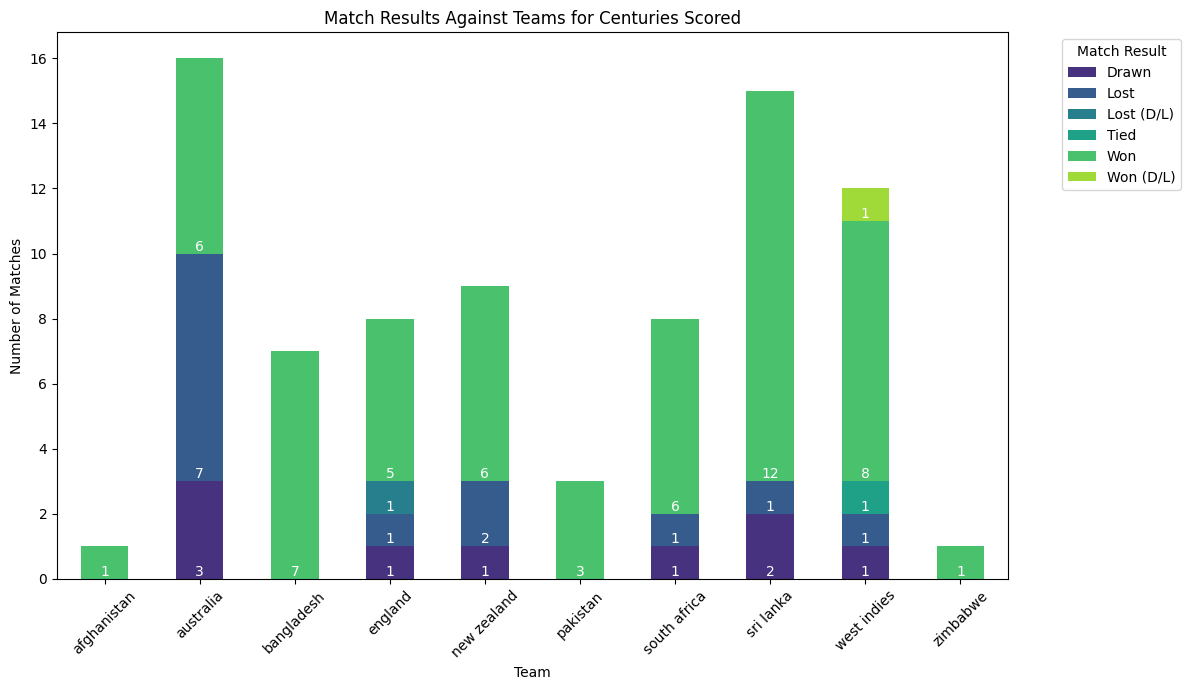

In [ ]:
result_by_team = data.groupby(['Against', 'Result']).size().unstack(fill_value=0)

# Resetting index for better formatting
result_by_team = result_by_team.reset_index()

# Plotting
plt.figure(figsize=(12, 7))
result_by_team.plot(kind='bar', x='Against', stacked=True, color=sns.color_palette("viridis", len(result_by_team.columns) - 1), ax=plt.gca())

# Adding counts on top of each segment
for i in range(result_by_team.shape[0]):
    for j in range(1, result_by_team.shape[1]):
        count = result_by_team.iloc[i, j]
        if count > 0:
            plt.annotate(str(count),
                         (i, result_by_team.iloc[i, 1:j].sum()),
                         ha='center', va='bottom', color='white')

plt.title('Match Results Against Teams for Centuries Scored')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Match Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---> Virat's centuries have guaranteed wins for India against Bangladesh and Pakistan. I am not counting Afghanistan and Zimbabwe because the sample size is very small.

Centuries across Positions


---



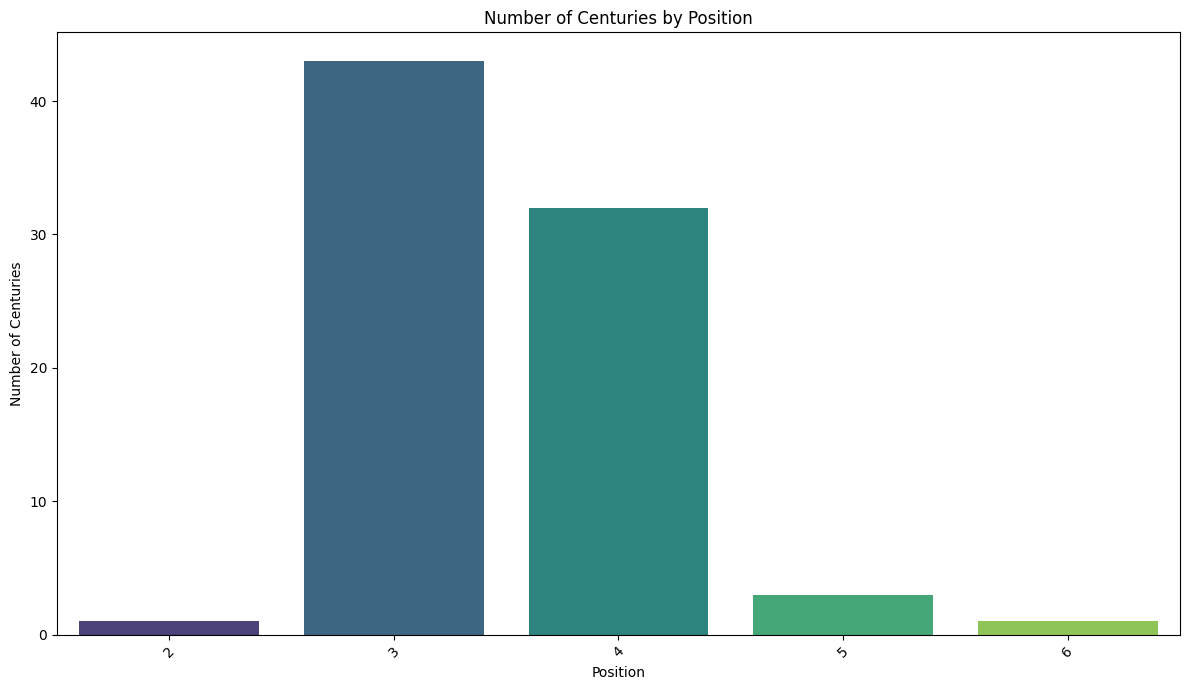

In [52]:
# Counting occurrences of each position for centuries and sort in ascending order
position_counts = data['Position'].value_counts().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')

plt.title('Number of Centuries by Position')
plt.xlabel('Position')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Filtering for centuries and position 6
centuries_position_6 = data[(data['Runs'] >= 100) & (data['Position'] == 6)]

# Displaying the result
print(centuries_position_6)

   No.  Runs    Against  Position  Innings                    Venue Ground  \
8    9   116  australia         6        2  Adelaide Oval, Adelaide   Away   

        Date Result Status Category  
8 2012-01-24   Lost    Out  100-149  


---> His 9th century came at Adelaide while batting at position 6 in 2012. Starting of his greatness maybe?

Centuries across Innings


---



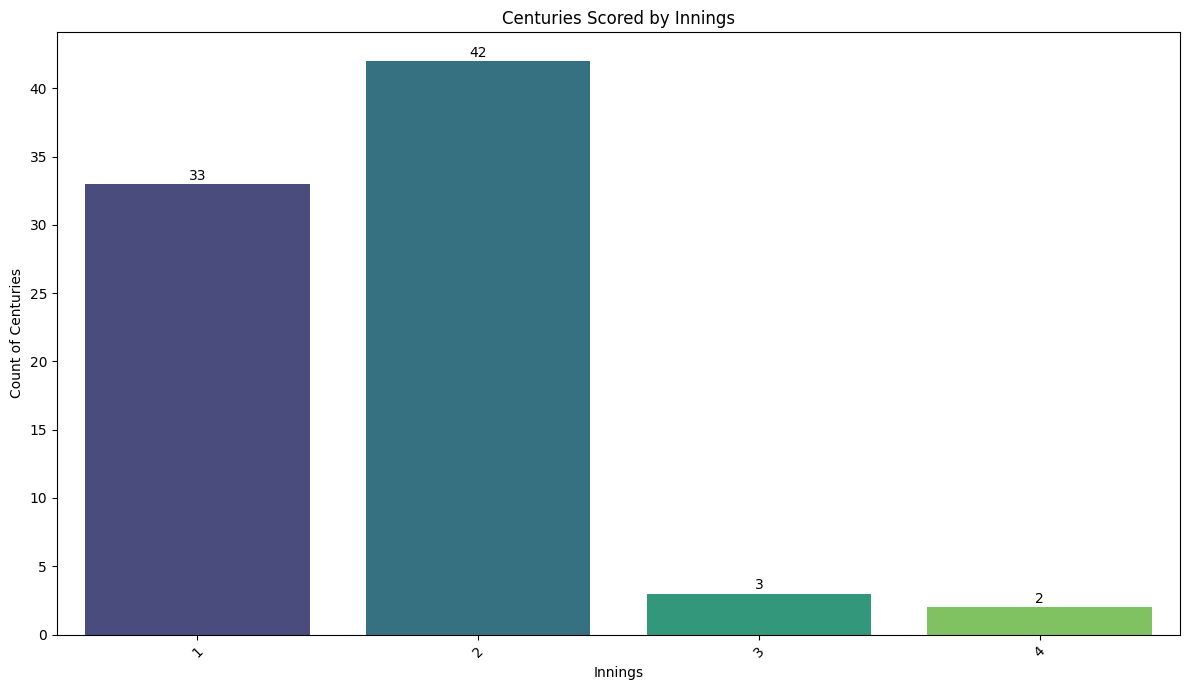

In [80]:
# Counting occurrences of centuries by innings
innings_counts = data['Innings'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=innings_counts.index, y=innings_counts.values, palette='viridis')

# Adding counts on top of each bar
for i in range(len(innings_counts)):
    count_value = innings_counts.values[i]
    plt.text(i, count_value + 0.1, str(count_value),
             ha='center', va='bottom', color='black')

plt.title('Centuries Scored by Innings')
plt.xlabel('Innings')
plt.ylabel('Count of Centuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> The number of centuries in the 2nd innings is the highest because of his reputation of being a chase master!

In [57]:
# Filtering for centuries in the 4th innings
centuries_4th_innings = data[(data['Runs'] >= 100) & (data['Innings'] == 4)]

# Displaying the result
print(centuries_4th_innings)

    No.  Runs      Against  Position  Innings                      Venue  \
23   24   105  new zealand         4        4  Basin Reserve, Wellington   
28   29   141    australia         4        4    Adelaide Oval, Adelaide   

   Ground       Date Result   Status Category  
23   Away 2014-02-14  Drawn  Not Out  100-149  
28   Away 2014-12-09   Lost      Out  100-149  


---> He has only two centuries in the 4th innings, but he has scored them in some challenging venues.

Centuries Across Venues


---



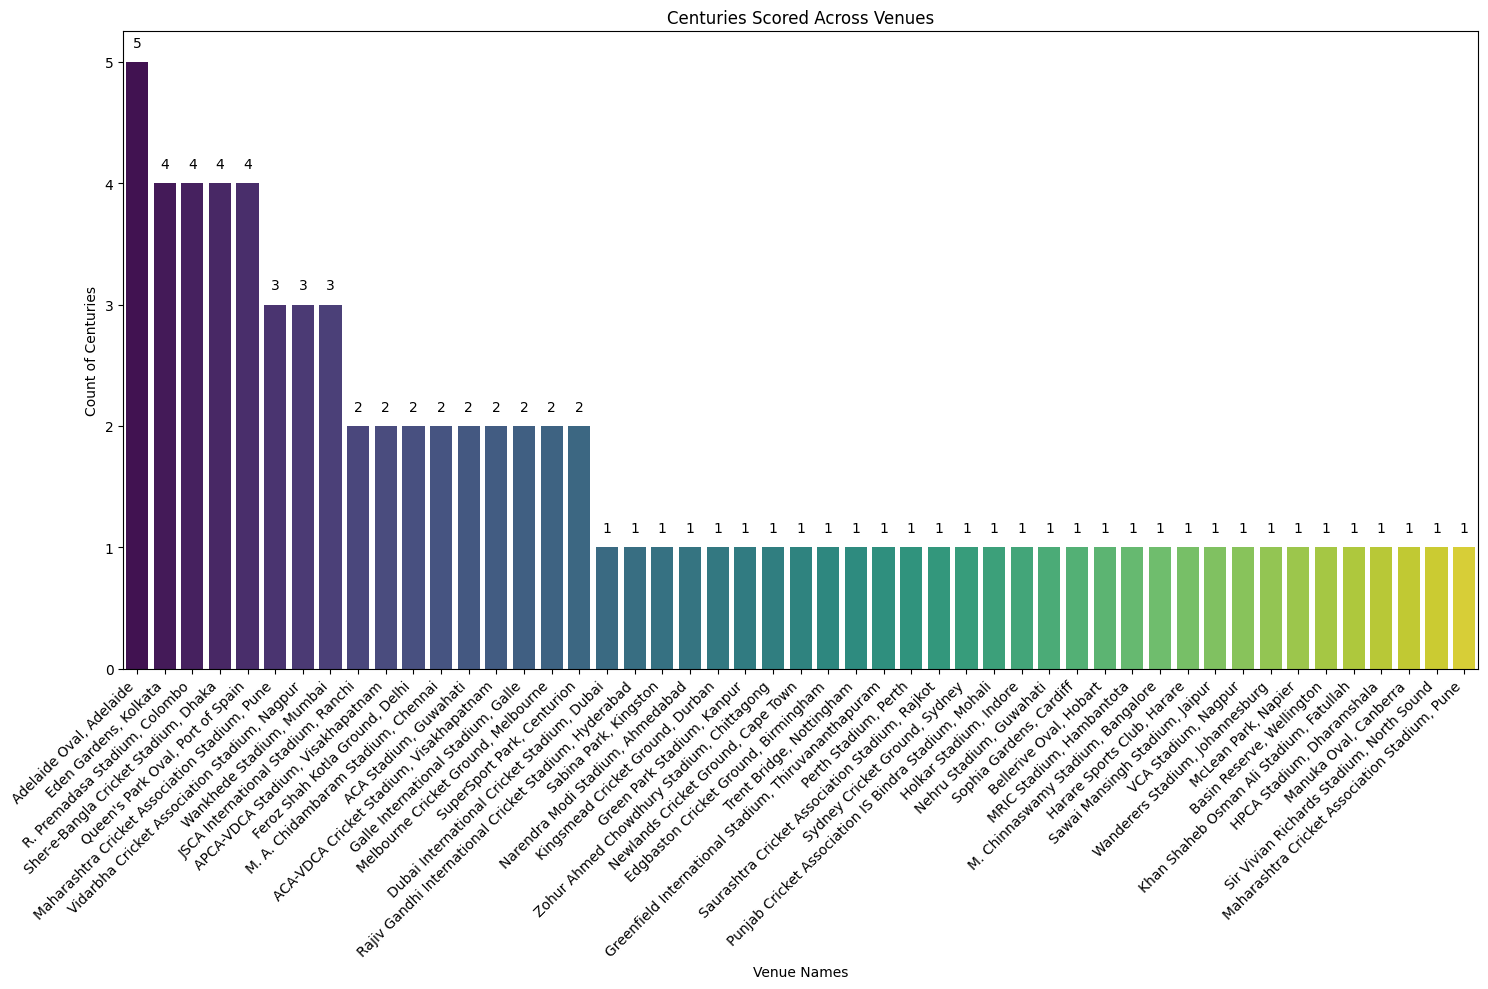

In [79]:
# Counting occurrences of centuries by venue
venue_counts = data['Venue'].value_counts()

# Plotting
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='viridis')

# Adding counts on top of each bar
for i in range(len(venue_counts)):
    count_value = venue_counts.values[i]
    plt.text(i, count_value + 0.1, str(count_value),
             ha='center', va='bottom', color='black')

plt.title('Centuries Scored Across Venues')
plt.xlabel('Venue Names')
plt.ylabel('Count of Centuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---> Adelaide seems like his favorite ground! He has scored more centuries there than in any home venue. Surprising!

Centuries in Terms of Home-Away Grounds


---



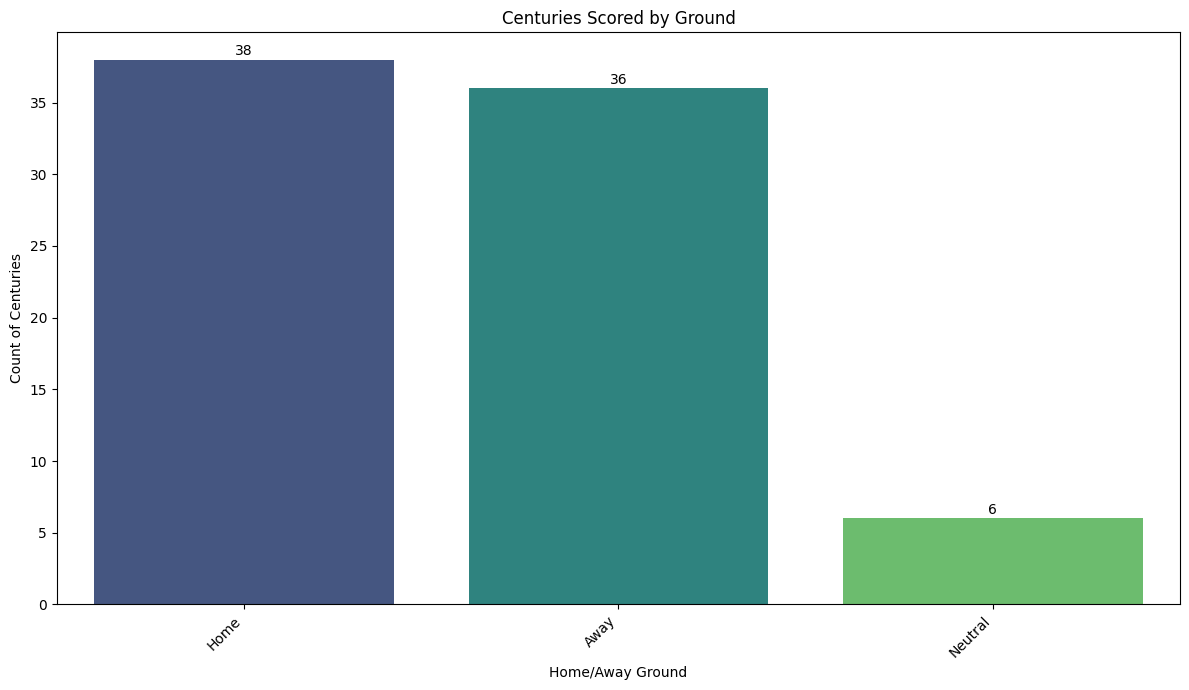

In [78]:
# Counting occurrences of centuries by ground
ground_counts = data['Ground'].value_counts()

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=ground_counts.index, y=ground_counts.values, palette='viridis')

# Adding counts on top of each bar
for i in range(len(ground_counts)):
    count_value = ground_counts.values[i]
    plt.text(i, count_value + 0.1, str(count_value),
             ha='center', va='bottom', color='black')

plt.title('Centuries Scored by Ground')
plt.xlabel('Home/Away Ground')
plt.ylabel('Count of Centuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---> When a player scores centuries evenly across home and away venues, that player easily becomes a great player in the history.

In [61]:
neutral_ground_data = data[(data['Runs'] >= 100) & (data['Ground'].str.contains("Neutral", case=False, na=False))]

# Displaying the result
print(neutral_ground_data)

    No.  Runs      Against  Position  Innings  \
9    10   133    sri lanka         4        2   
10   11   108    sri lanka         3        1   
11   12   183     pakistan         3        2   
31   32   107     pakistan         3        1   
70   71   122  afghanistan         2        1   
76   77   122     pakistan         3        1   

                                         Venue   Ground       Date Result  \
9                       Bellerive Oval, Hobart  Neutral 2012-02-28    Won   
10        Sher-e-Bangla Cricket Stadium, Dhaka  Neutral 2012-03-13    Won   
11        Sher-e-Bangla Cricket Stadium, Dhaka  Neutral 2012-03-18    Won   
31                     Adelaide Oval, Adelaide  Neutral 2015-02-15    Won   
70  Dubai International Cricket Stadium, Dubai  Neutral 2022-09-08    Won   
76               R. Premadasa Stadium, Colombo  Neutral 2023-09-11    Won   

     Status Category  
9   Not Out  100-149  
10      Out  100-149  
11      Out  150-199  
31      Out  100-149  
7

---> Interesting observation is that India has won all their neutral venue matches when Virat has scored a century.

Centuries Across the Years


---



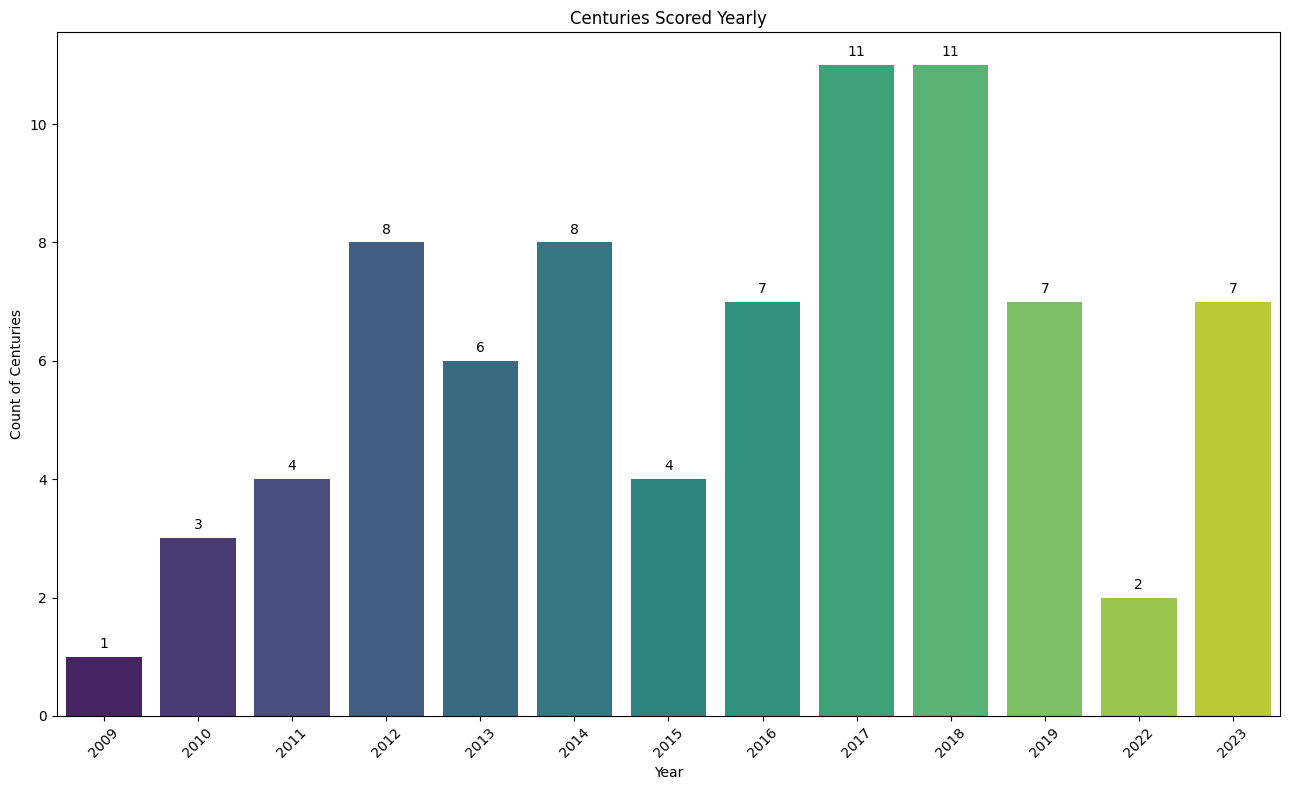

In [67]:
# Converting 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extracting the year from the date
data['Year'] = data['Date'].dt.year

# Filtering for centuries (100 or more)
centuries = data[data['Runs'] >= 100]

# Counting occurrences of centuries by year
yearly_counts = centuries['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=yearly_counts.index.astype(int), y=yearly_counts.values, palette='viridis')

# Adding counts on top of each bar
for i in range(len(yearly_counts)):
    count_value = yearly_counts.values[i]
    plt.text(i, count_value + 0.1, str(count_value),
             ha='center', va='bottom', color='black')

plt.title('Centuries Scored Yearly')
plt.xlabel('Year')
plt.ylabel('Count of Centuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> In the years 2017 & 2018, he has scored 22 centuries! That is phenomenal. Also, they came against some quality teams. Kudos to him!

In [75]:
# Filtering for centuries scored in 2017 and 2018
centuries_2017_2018 = data[(data['Runs'] >= 100) & (data['Year'].isin([2017, 2018]))]

# Selecting relevant columns (e.g., Year, Against, Runs)
result_table = centuries_2017_2018[['Year', 'Against', 'Runs']]

# Displaying the result
print(result_table)

      Year       Against  Runs
41  2017.0       england   122
42  2017.0    bangladesh   204
43  2017.0   west indies   111
44  2017.0     sri lanka   103
45  2017.0     sri lanka   131
46  2017.0     sri lanka   110
47  2017.0   new zealand   121
48  2017.0   new zealand   113
49  2017.0     sri lanka   104
50  2017.0     sri lanka   213
51  2017.0     sri lanka   243
52  2018.0  south africa   153
53  2018.0  south africa   112
54  2018.0  south africa   160
55  2018.0  south africa   129
56  2018.0       england   149
57  2018.0       england   103
58  2018.0   west indies   139
59  2018.0   west indies   140
60  2018.0   west indies   157
61  2018.0   west indies   107
62  2018.0     australia   123


In [68]:
# Filtering for centuries scored in 2022
centuries_2022 = data[(data['Runs'] >= 100) & (data['Year'] == 2022)]

# Displaying the result
print(centuries_2022)

    No.  Runs      Against  Position  Innings  \
70   71   122  afghanistan         2        1   
71   72   113   bangladesh         3        1   

                                         Venue   Ground       Date Result  \
70  Dubai International Cricket Stadium, Dubai  Neutral 2022-09-08    Won   
71   Zohur Ahmed Chowdhury Stadium, Chittagong     Away 2022-12-10    Won   

     Status Category    Year  
70  Not Out  100-149  2022.0  
71      Out  100-149  2022.0  


---> In the recent times, 2022 has been very quiet for him, probably due to the pandemic situation, but his centuries still had positive impact for India.

Centuries x Status (Not Out / Out)


---



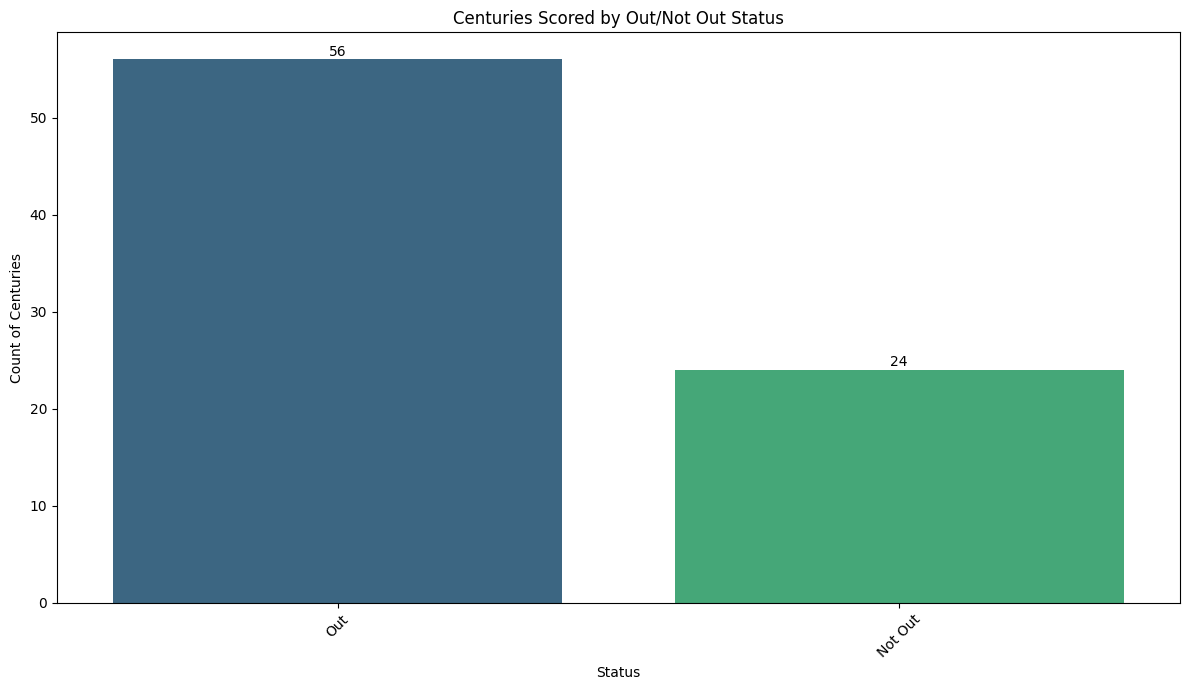

In [77]:
# Counting occurrences of centuries by status
status_counts = centuries['Status'].value_counts()

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Adding counts on top of each bar
for i in range(len(status_counts)):
    count_value = status_counts.values[i]
    plt.text(i, count_value + 0.1, str(count_value),
             ha='center', va='bottom', color='black')

plt.title('Centuries Scored by Out/Not Out Status')
plt.xlabel('Status')
plt.ylabel('Count of Centuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> That is a very healthy amount of times that he has remained "Not Out".

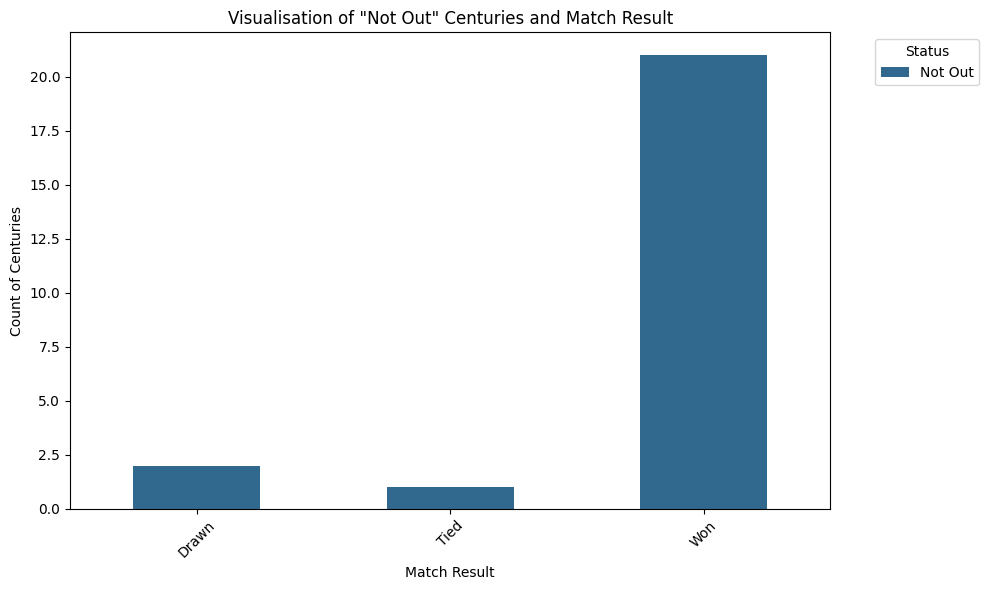

In [74]:
# Filtering for centuries (100 or more) and "Not Out" status
not_out_centuries = data[(data['Runs'] >= 100) & (data['Status'] == "Not Out")]

# Creating a cross-tabulation of "Not Out" centuries against results
comparison = pd.crosstab(not_out_centuries['Result'], not_out_centuries['Status'])

# Plotting the comparison
plt.figure(figsize=(10, 6))
comparison.plot(kind='bar', stacked=True, color=sns.color_palette("viridis", 2), ax=plt.gca())

plt.title('Visualisation of "Not Out" Centuries and Match Result')
plt.xlabel('Match Result')
plt.ylabel('Count of Centuries')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---> You can see that his "Not Out" centuries have always ensured a neutral or positive result for India.

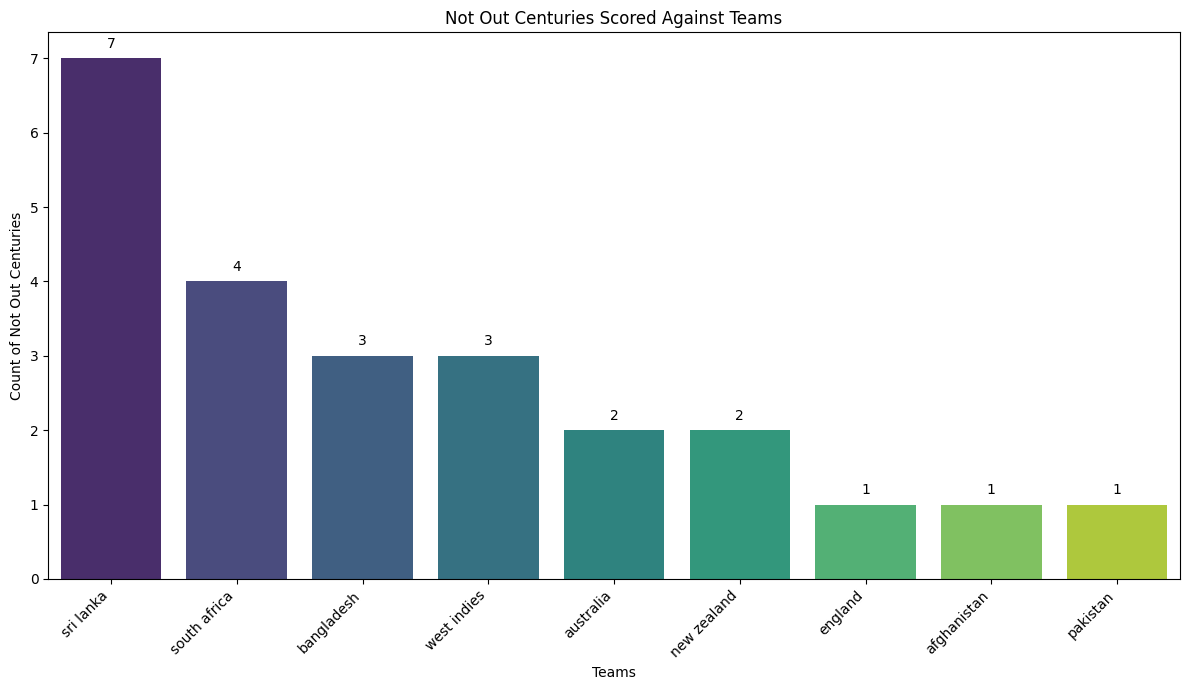

In [72]:
# Filtering for "Not Out" centuries (100 or more)
not_out_centuries = data[(data['Runs'] >= 100) & (data['Status'] == "Not Out")]

# Counting occurrences of centuries by team
team_counts = not_out_centuries['Against'].value_counts()

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')

# Adding counts on top of each bar
for i in range(len(team_counts)):
    count_value = team_counts.values[i]
    plt.text(i, count_value + 0.1, str(count_value),
             ha='center', va='bottom', color='black')  # Adjust y-position if necessary

plt.title('Not Out Centuries Scored Against Teams')
plt.xlabel('Teams')
plt.ylabel('Count of Not Out Centuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---> Sri Lanka has particularly suffered due to Virat's centuries where has remained not out.